# Geospatial Data Analytics with Python - Example 1-1: Earthquakes in Afghanistan
___

## A) Dataset load with Pandas (Coordinates data)

In [1]:
# Libraries import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# CSV Dataset Load
df = pd.read_csv('/IT Training/DatasetsForLearning/GSDA/DATA-EARTHQUAKES_1.csv')
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Country
0,2023-05-28,00:24:55,36.80,71.31,100.0,4.6,Afghanistan
1,2023-05-26,13:08:12,40.32,74.01,20.0,4.2,Kyrgyzstan
2,2023-05-26,07:34:47,37.87,73.52,179.0,4.3,Tajikistan
3,2023-05-25,16:00:16,37.04,71.11,229.0,4.0,Afghanistan
4,2023-05-25,04:30:49,36.43,71.13,100.0,4.1,Afghanistan


In [3]:
# Display the number of entries (number of rows and columns)
rows,cols = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

Number of rows: 5290
Number of columns: 7


In [4]:
# Remove any white spaces in columns
df.columns = df.columns.str.strip()
# Display column names
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Country'],
      dtype='object')

In [5]:
# Display datatypes
df.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
Depth        float64
Magnitude    float64
Country       object
dtype: object

Text(0.5, 1.0, 'Missing values present in columns')

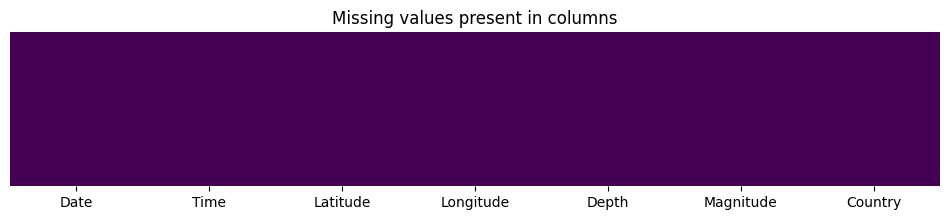

In [6]:
# Display any missing values
plt.figure(figsize=(12,2))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing values present in columns') 

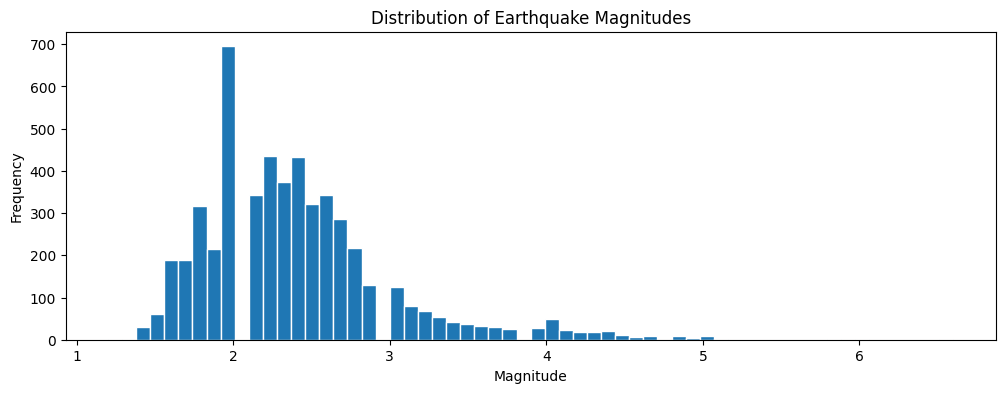

In [7]:
# Distribution of earthquake magnitudes
# sns.displot(df['Magnitude'], bins=60)

plt.figure(figsize=(12, 4))
plt.hist(df['Magnitude'], edgecolor='white', bins=60)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

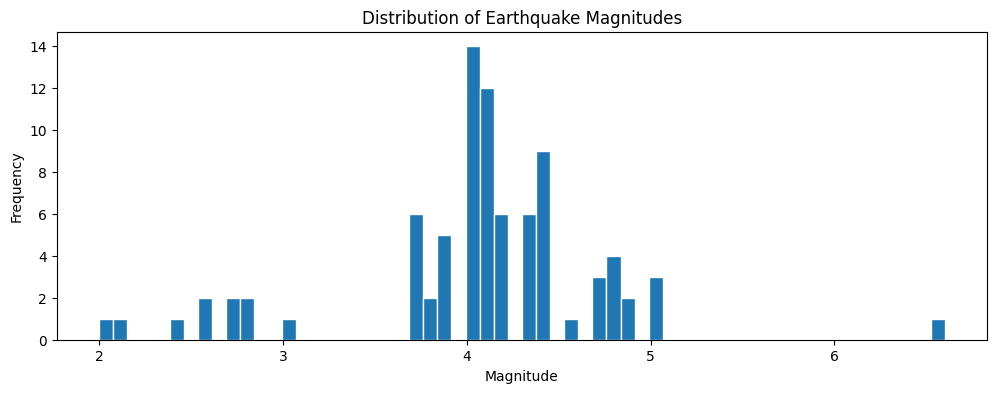

In [8]:
# Distribution of earthquake magnitudes FOR Afghanistan only
plt.figure(figsize=(12, 4))
a = df[df["Country"] == "Afghanistan"]
plt.hist(a['Magnitude'], edgecolor='white', bins=60)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

___
## B) Dataframe to GeoDataFrame Conversion (Coordinates data)

In [9]:
# Libraries import
import geopandas as gpd
import geodatasets
from geodatasets import get_path

In [10]:
# Conversion of latitude & longitude into Geometry: points_from_xy()
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Country,geometry
0,2023-05-28,00:24:55,36.80,71.31,100.0,4.6,Afghanistan,POINT (71.31000 36.80000)
1,2023-05-26,13:08:12,40.32,74.01,20.0,4.2,Kyrgyzstan,POINT (74.01000 40.32000)
2,2023-05-26,07:34:47,37.87,73.52,179.0,4.3,Tajikistan,POINT (73.52000 37.87000)
3,2023-05-25,16:00:16,37.04,71.11,229.0,4.0,Afghanistan,POINT (71.11000 37.04000)
4,2023-05-25,04:30:49,36.43,71.13,100.0,4.1,Afghanistan,POINT (71.13000 36.43000)


<Axes: >

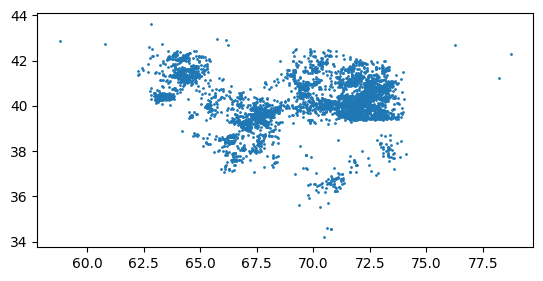

In [11]:
# Quick plot of coordinates without map base layer
gdf.plot(markersize=1)

In [12]:
# CSV conversion to Shapefile(.shp) so that geometries can be fixed onto data.
gdf.to_file("gsdap1-1.shp", crs='EPSG:4326')

In [28]:
# CSV conversion to GeoJSON(.geojson)

In [13]:
# Shapfile load for plots
c = gpd.read_file('gsdap1-1.shp')
c.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,Country,geometry
0,2023-05-28,00:24:55,36.80,71.31,100.0,4.6,Afghanistan,POINT (71.31000 36.80000)
1,2023-05-26,13:08:12,40.32,74.01,20.0,4.2,Kyrgyzstan,POINT (74.01000 40.32000)
2,2023-05-26,07:34:47,37.87,73.52,179.0,4.3,Tajikistan,POINT (73.52000 37.87000)
3,2023-05-25,16:00:16,37.04,71.11,229.0,4.0,Afghanistan,POINT (71.11000 37.04000)
4,2023-05-25,04:30:49,36.43,71.13,100.0,4.1,Afghanistan,POINT (71.13000 36.43000)


In [14]:
# Coordinates Reference System check
c.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

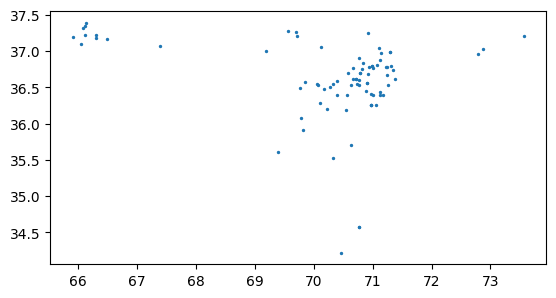

In [15]:
# Coordinates plot: Afghanistan ONLY
afg4326 = c[c["Country"] == "Afghanistan"]
afg4326.plot(markersize=2)

<Axes: >

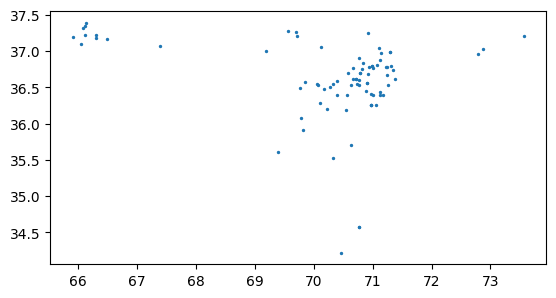

In [16]:
# ALTERNATIVE METHOD
# Data Subset: Information filtration via the MASK parameter (Geometry)
afg = gpd.read_file('gsdap1-1.shp', mask = c[c["Country"] == "Afghanistan"])
afg.plot(markersize=2)

<Axes: >

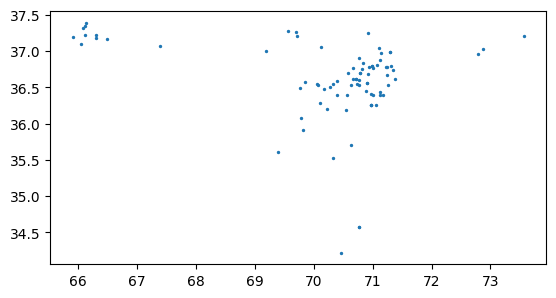

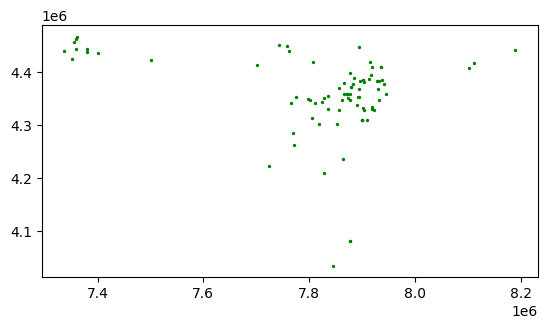

In [17]:
# CRS Reprojection - Data projection into Mercator epsg=3395: to_crs()
# In EPSG=3395, latitude-longitude quadrangles are stretched along the x-axis and y-axis
afg3395 = afg4326.to_crs(epsg=3395)
afg4326.plot(markersize=2)
afg3395.plot(color='green', markersize=2)

___
## C) Base Map

In [18]:
# Load polygon data for basemap
bm = gpd.read_file('/IT Training/DatasetsForLearning/GSDA/countries.shp')
bm.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [19]:
# Display the number of entries (number of rows and columns)
rows,cols = bm.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

Number of rows: 255
Number of columns: 12


In [20]:
# Base map CRS check
bm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

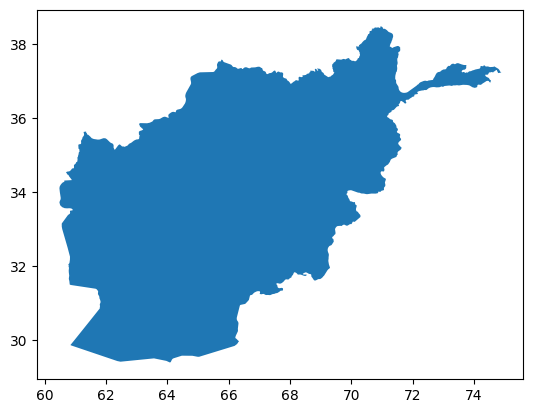

In [21]:
# Base map plot: Afghanistan ONLY
afgmap4326 = bm[bm["NAME"] == "Afghanistan"]
afgmap4326.plot()

Text(0.5, 1.0, 'Earthquakes in Afghanistan (EPSG4326)')

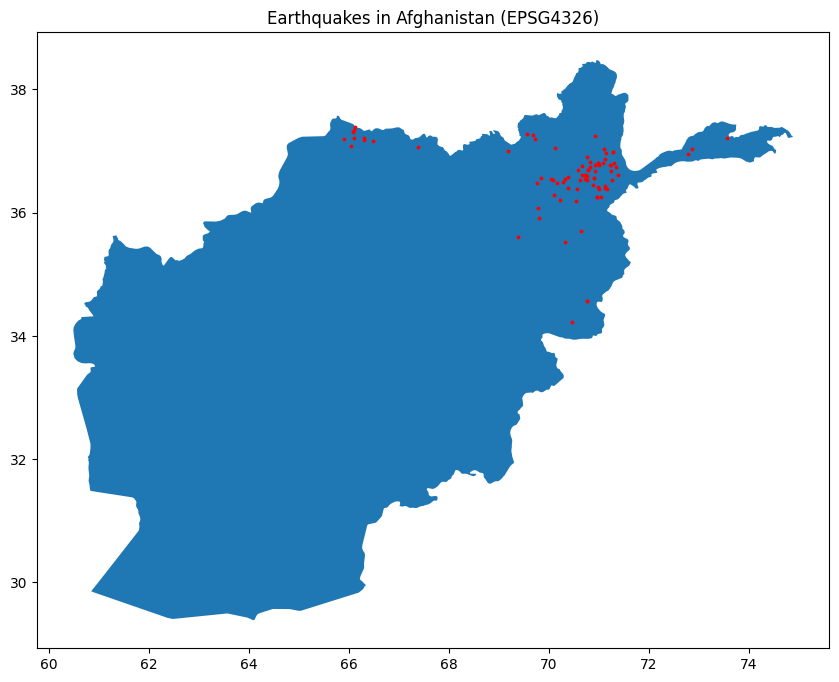

In [22]:
# Overlay EPSG4326: Base map + Coordinates data (Afghanistan Only)
fig, ax = plt.subplots(figsize=(12,8))
afgmap4326.plot(ax=ax)
afg4326.plot(ax=ax, color='red', markersize=3)
plt.title('Earthquakes in Afghanistan (EPSG4326)')

<Axes: >

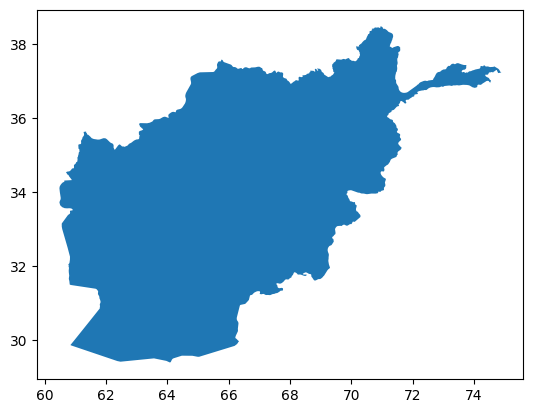

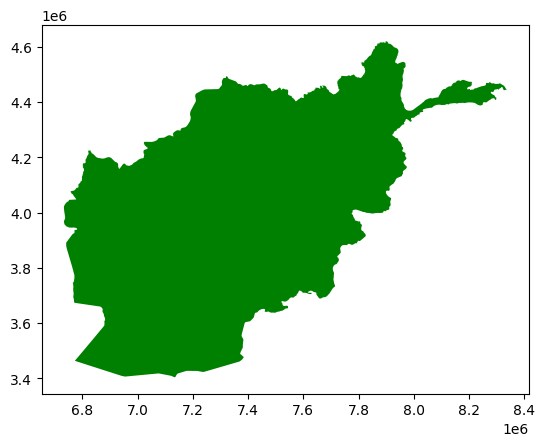

In [27]:
# Base map CRS Reprojection - Data projection into Mercator epsg=3395: to_crs()
bm3395 = afgmap4326.to_crs(epsg=3395)
afgmap4326.plot()
bm3395.plot(color='green')

Text(0.5, 1.0, 'Earthquakes in Afghanistan (EPSG3395)')

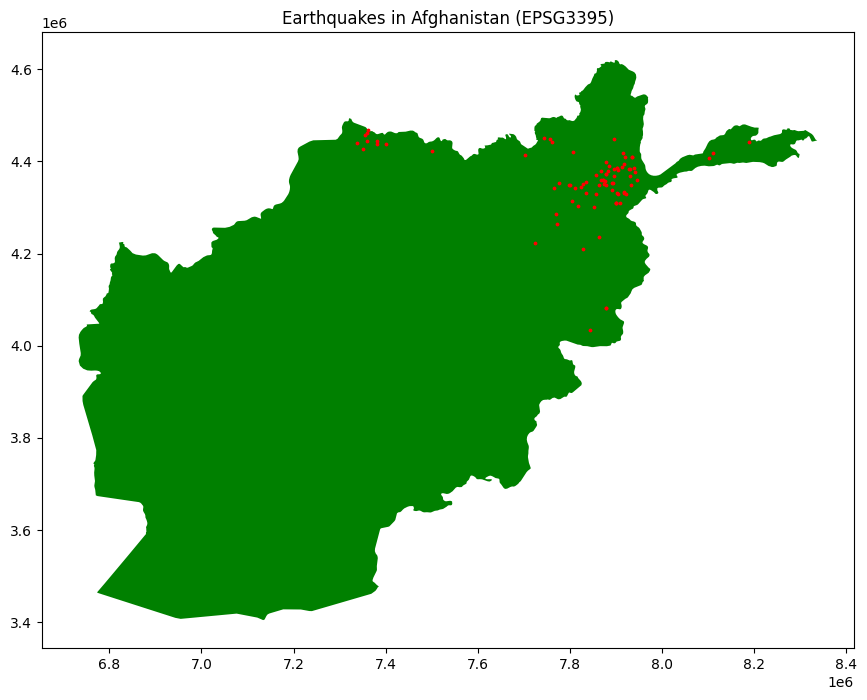

In [28]:
# Overlay EPSG3395: Base map + Coordinates data (Afghanistan Only)
fig, ax = plt.subplots(figsize=(12,8))
bm3395.plot(ax=ax, color='green')
afg3395.plot(ax=ax, color='red', markersize=3)
plt.title('Earthquakes in Afghanistan (EPSG3395)')

In [29]:
# GeoPandas Built-in Datasets: Check Availabilty
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

<Axes: >

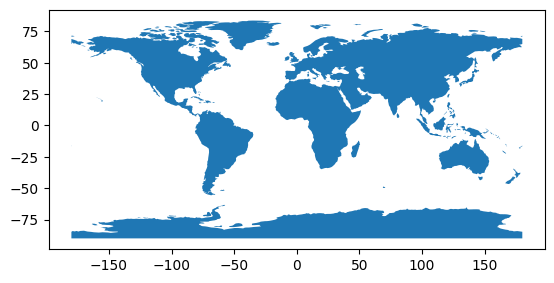

In [30]:
# ALTERNATE METHOD: World map from geodatasets (Customised display area) + Coordinates data (Afghanistan Only)
world = gpd.read_file(get_path("naturalearth.land"))
world.head()
world.plot()

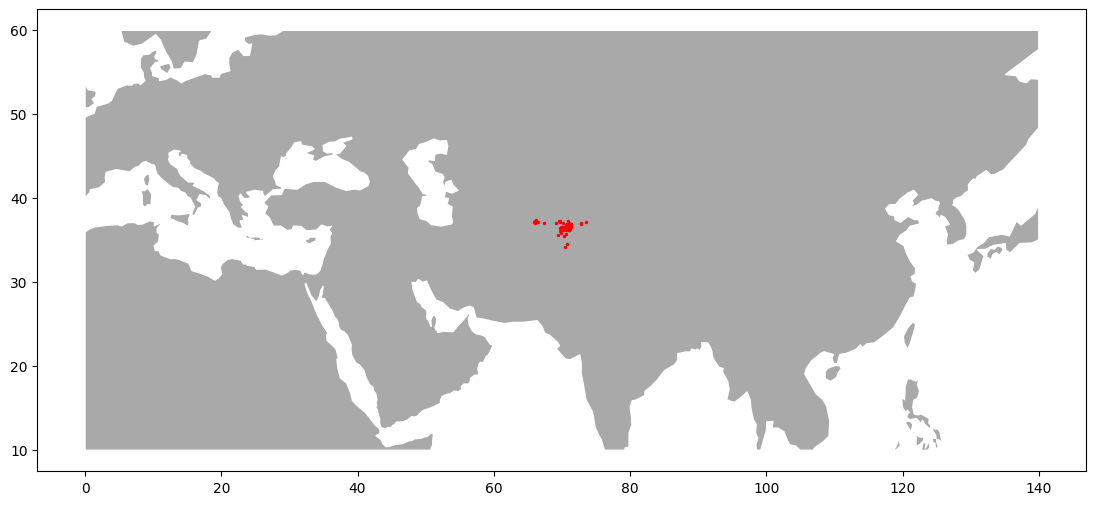

In [31]:
# Using the above world map from the geodataset
fig, ax = plt.subplots(figsize=(18,6))
ca = world.clip([0, 10, 140, 60]).plot(ax=ax, color='darkgrey', edgecolor="white")
afg4326.plot(ax=ax, color='red', markersize=2)
plt.show()

___
## C) World Cities

In [32]:
wc = pd.read_csv('/IT Training/DatasetsForLearning/GSDA/worldcities_csv.csv')
wc.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [33]:
# Display the number of entries (number of rows and columns)
rows,cols = wc.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

Number of rows: 44691
Number of columns: 11


In [34]:
# Isolate data of cities in Afghanistan
afc = wc[wc["country"] == "Afghanistan"]
rows,cols = afc.shape
print(f'Number of rows: {rows}')

Number of rows: 69


In [35]:
# Isolate data of the Afghanistan capital: Kabul
afcap = afc[afc["capital"] == "primary"]
afcap

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
176,Kabul,Kabul,34.5253,69.1783,Afghanistan,AF,AFG,Kābul,primary,4273156.0,1004993580


In [36]:
# Geodataframe Conversion of latitude & longitude into Geometry: points_from_xy() [Afghanistan Cities Only]
# CSV conversion to Shapefile(.shp)
afgc = gpd.GeoDataFrame(afc, geometry=gpd.points_from_xy(afc.lng, afc.lat))
afgc.to_file("afgc.shp", crs='EPSG:4326')

In [37]:
# Geodataframe Conversion of latitude & longitude into Geometry: points_from_xy() [Kabul Only]
# CSV conversion to Shapefile(.shp)
kabul = gpd.GeoDataFrame(afcap, geometry=gpd.points_from_xy(afcap.lng, afcap.lat))
kabul.to_file("kabul.shp", crs='EPSG:4326')

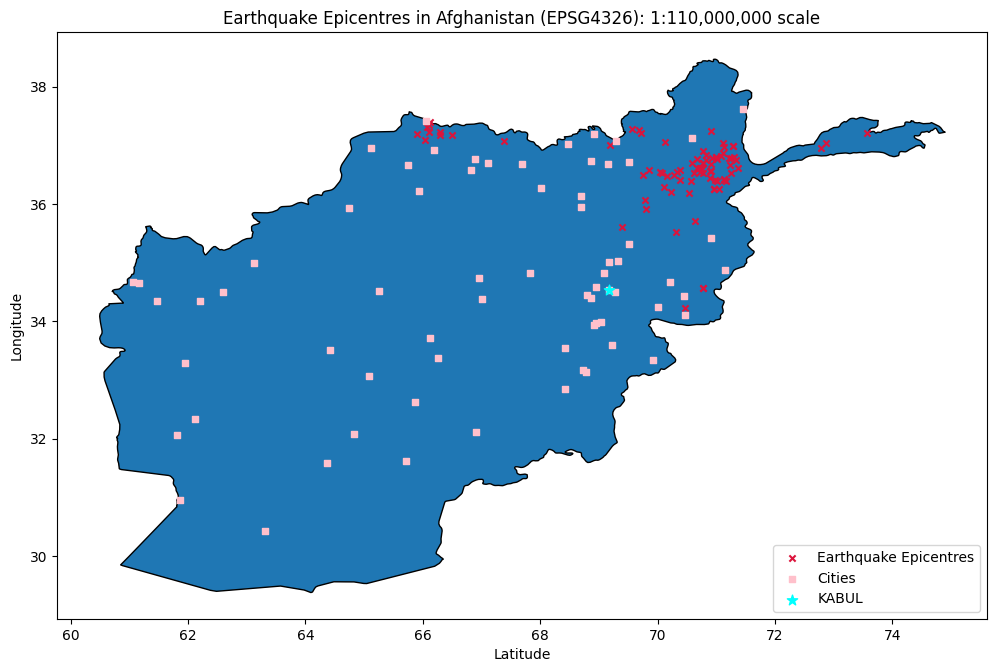

In [42]:
# Overlay EPSG4326: Base map + Coordinates data (Afghanistan Only)
fig, ax = plt.subplots(figsize=(12,10))
afgmap4326.plot(ax=ax, edgecolor='black')
afg4326.plot(ax=ax, color='crimson', marker='x', markersize=20, label='Earthquake Epicentres')
afgc.plot(ax=ax, color='pink', marker='s', markersize=20, label='Cities')
kabul.plot(ax=ax, color='cyan', marker='*', markersize=60, label='KABUL')
plt.title('Earthquake Epicentres in Afghanistan (EPSG4326): 1:110,000,000 scale')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc=4)

___
## D) Buffer Analysis (Metres unit)

In [152]:
# CRS Reprojection - EPSG:3006 (metre units)
afgmap3006 = afgmap4236.to_crs('EPSG:3006')
afg3006 = afg4326.to_crs('EPSG:3006')

Text(0.5, 1.0, 'Earthquakes Epicentres: 5 & 10 KM radius (EPSG3006)')

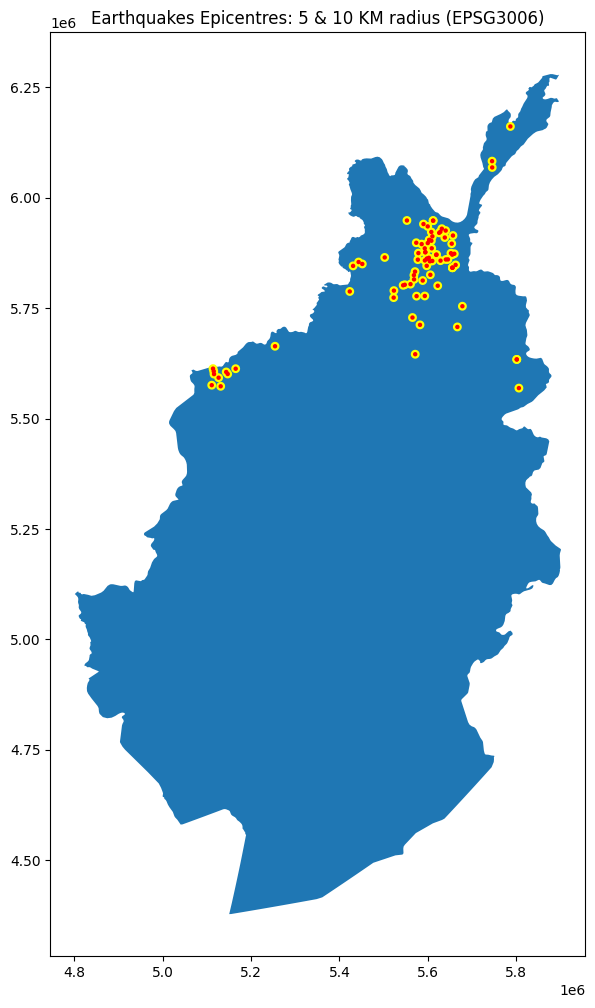

In [154]:
# Create and plot a buffer of 5 & 10 km
q10 = afg3006.buffer(5000)
q50 = afg3006.buffer(10000)

fig, ax = plt.subplots(figsize=(12,12))
afgmap3006.plot(ax=ax)
q50.plot(ax=ax, color='yellow')
q10.plot(ax=ax, color='red')

plt.title('Earthquakes Epicentres: 5 & 10 KM radius (EPSG3006)')

___
## E) More about geodatasets
Note: Use of geodatasets is free of charge but available maps are limited.

In [69]:
# To show the available datasets
import geodatasets
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [72]:
# To get details of a certain datasets 
geodatasets.data.naturalearth.land

{'url': 'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip',
 'license': 'CC0',
 'attribution': 'Natural Earth',
 'name': 'naturalearth.land',
 'description': 'Land polygons including major islands in a 1:110m resolution.',
 'geometry_type': 'Polygon',
 'details': 'https://www.naturalearthdata.com/downloads/110m-physical-vectors/110m-land/',
 'nrows': 127,
 'ncols': 4,
 'hash': '1926c621afd6ac67c3f36639bb1236134a48d82226dc675d3e3df53d02d2a3de',
 'filename': 'ne_110m_land.zip'}

___
## F) Natural Earth Maps
* https://www.naturalearthdata.com/
* Free to download and can be used as base maps.
* Available as shapefiles

<Axes: >

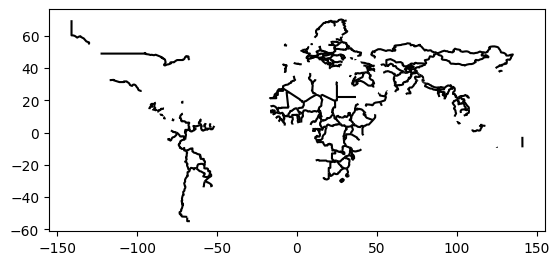

In [80]:
# Example Map One: 1:110m Cultural Vectors Admin 0 - Boundary Lines
ne1 = gpd.read_file('/IT Training/DatasetsForLearning/GSDA/ne_110m_admin_0_boundary_lines_land.shp')
ne1.plot(color='black')

<Axes: >

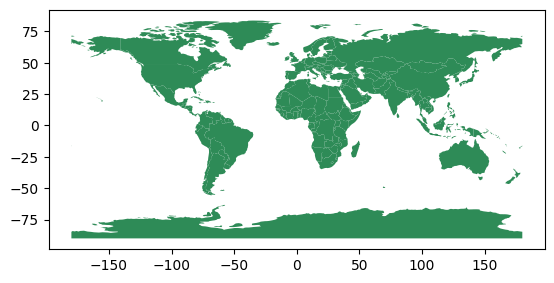

In [97]:
# Example Map Two: 1:110m Cultural Vectors Admin 0 - Countries
ne2 = gpd.read_file('/IT Training/DatasetsForLearning/GSDA/ne_110m_admin_0_countries.shp')
ne2.plot(color='seagreen')

In [ ]:
# Print all rows as strings
print(ne2.to_string())

<Axes: >

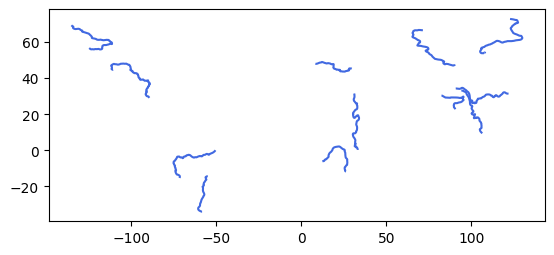

In [108]:
# Example Map Three: 1:110m Physical Vectors Lakes + Reservoirs
ne3 = gpd.read_file('/IT Training/DatasetsForLearning/GSDA/ne_110m_rivers_lake_centerlines.shp')
ne3.plot(color='royalblue')

In [135]:
# Example Map Four: 1:110m Cultural Vectors Populated Places
ne4 = gpd.read_file('/IT Training/DatasetsForLearning/GSDA/ne_110m_populated_places.shp')
ne4.head(1)

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,...,None,None,None,None,None,None,None,None,None,POINT (12.45339 41.90328)


In [136]:
# CRS quick check
print(f'Map 1: {ne1.crs}')
print(f'Map 2: {ne2.crs}')
print(f'Map 3: {ne3.crs}')
print(f'Map 4: {ne4.crs}')

Map 1: EPSG:4326
Map 2: EPSG:4326
Map 3: EPSG:4326
Map 4: EPSG:4326


Text(0.5, 1.0, 'Overlay of three Natural Earth Maps (EPSG4326)')

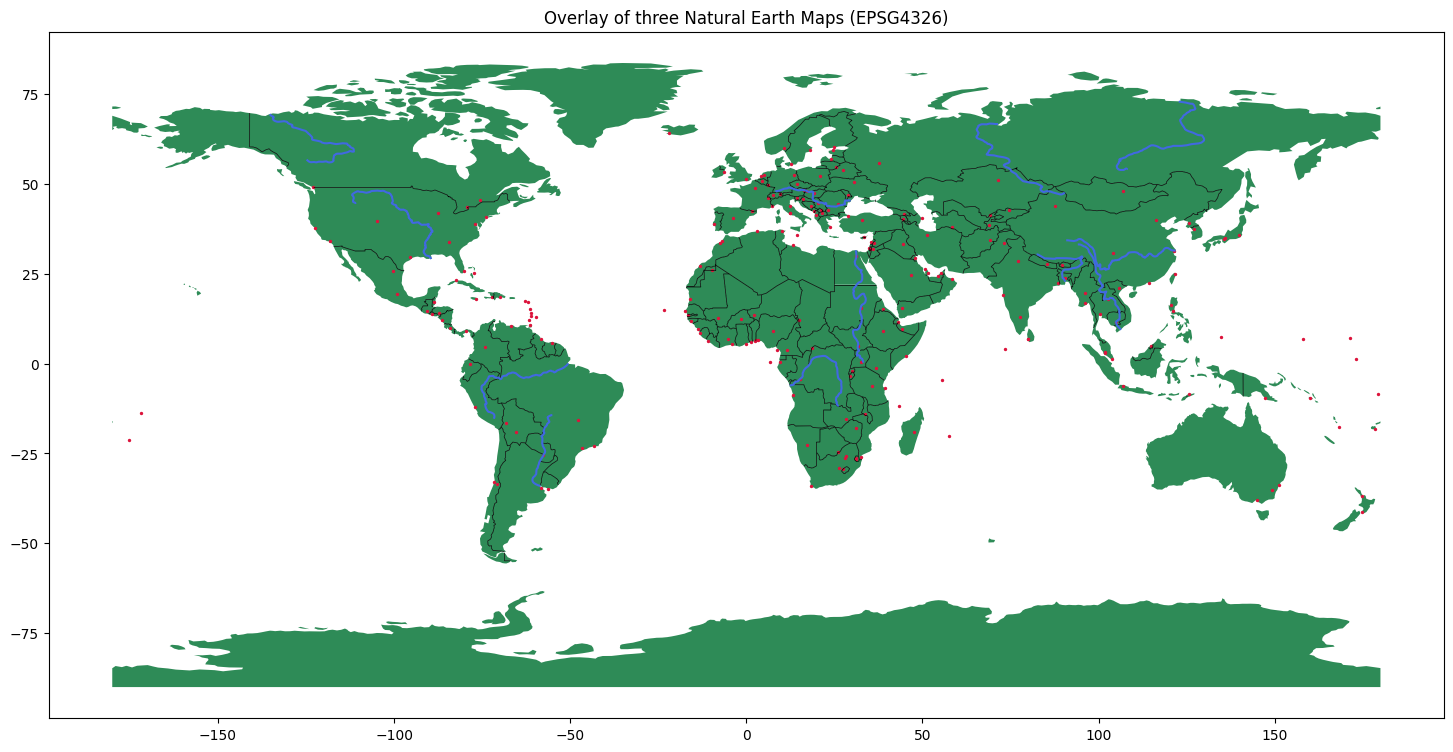

In [158]:
# Overlay EPSG4326: Above four NE maps
fig, ax = plt.subplots(figsize=(18,12))
ne1.plot(ax=ax, color='black', linewidth=0.5)
ne2.plot(ax=ax, color='seagreen')
ne3.plot(ax=ax, color='royalblue')
ne4.plot(ax=ax, color='crimson', markersize=2)
plt.title('Overlay of three Natural Earth Maps (EPSG4326)')

<Axes: >

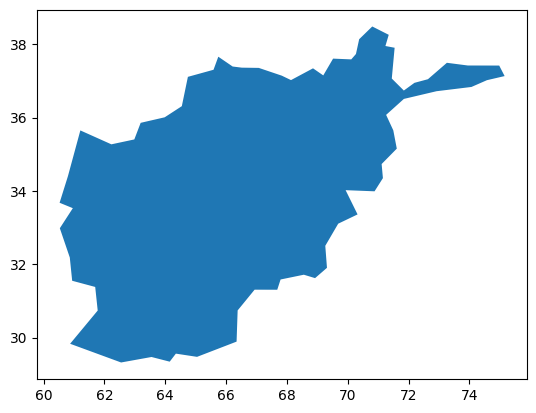

In [128]:
# Isolate polygons: Afghanistan ONLY
ne2af = ne2[ne2["SOV_A3"] == "AFG"]
ne2af.plot()

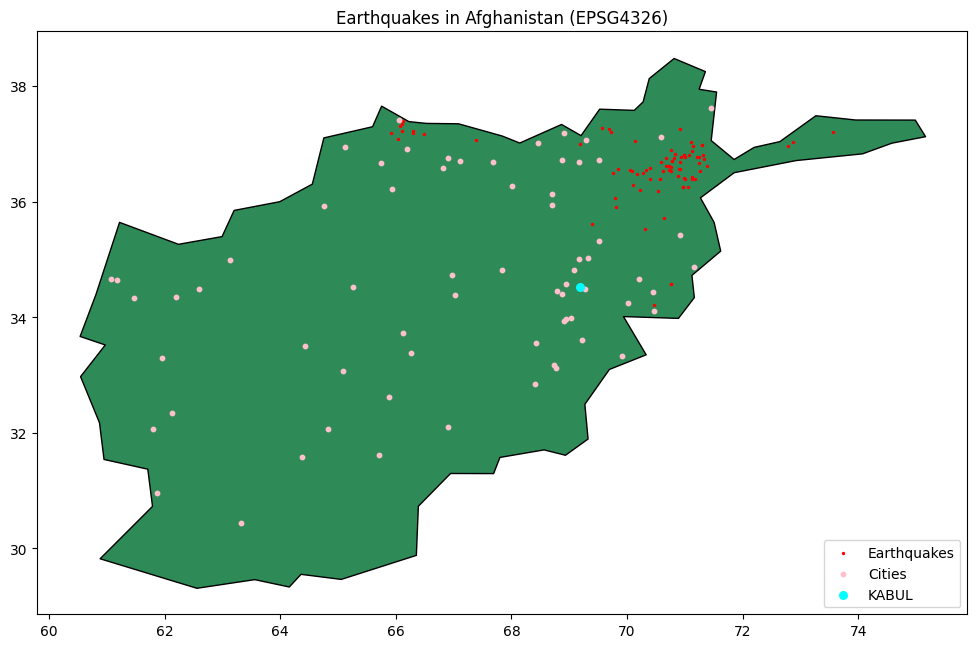

In [131]:
# Overlay EPSG4326: Replicate of the above map from section C but using NE map 1:110m Cultural Vectors Admin 0 - Countries
# Notice the rough boundary lines due to small scale data (1:110m)
fig, ax = plt.subplots(figsize=(12,8))
ne2af.plot(ax=ax, color='seagreen', edgecolor='black')
afg4326.plot(ax=ax, color='red', markersize=2, label='Earthquakes')
afcg.plot(ax=ax, color='pink', markersize=10, label='Cities')
kabul.plot(ax=ax, color='cyan', markersize=30, label='KABUL')
plt.title('Earthquakes in Afghanistan (EPSG4326)')
plt.legend(loc=4)

___